IEE

In [ ]:
import pandas as pd

# Carga tus datos desde el archivo CSV o Excel exportado
df = pd.read_csv('busqueda1.csv')


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Elimina palabras irrelevantes (stop words)
stop_words = set(stopwords.words('english'))  # Utiliza 'english' en lugar de 'Authors'
df['Document Title'] = df['Document Title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Realiza stemming (opcional)
stemmer = PorterStemmer()
df['Document Title'] = df['Document Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install wordcloud


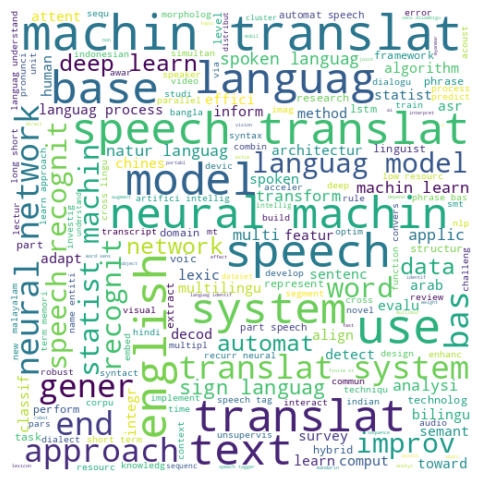

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combina todos los textos en un solo string
text = ' '.join(df['Document Title'])

# Crea la nube de palabras
wordcloud = WordCloud(width=500, height=500, background_color='white',relative_scaling=0.1).generate(text)

# Muestra la nube de palabras
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
wordcloud.to_file("IEE.png")

In [ ]:
!pip install reportlab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import matplotlib.pyplot as plt

# Combina todos los textos en un solo string
text = ' '.join(df['Document Title'])

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Guarda la nube de palabras como una imagen PNG
wordcloud.to_file("wordcloud.png")

# Crea un archivo PDF
pdf_file = "wordcloud.pdf"

c = canvas.Canvas(pdf_file, pagesize=letter)

# Agrega la imagen al PDF
image = ImageReader("wordcloud.png")
c.drawImage(image, 100, 400, width=400, height=200)  # Ajusta la posición y el tamaño según tus necesidades

# Guarda y cierra el PDF
c.showPage()
c.save()

# Descarga el PDF
from google.colab import files

files.download(pdf_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACM

In [ ]:
!pip install bibtexparser

import bibtexparser

# Abre y lee el archivo .bib
with open('acm.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Accede a los campos de interés (por ejemplo, 'title', 'abstract', 'keywords')
entries = bib_database.entries
text = ' '.join([entry.get('title', '') + ' ' + entry.get('abstract', '') + ' ' + entry.get('keywords', '') for entry in entries])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 414.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.4.1-py3-none-any.whl size=43252 sha256=3b15edc749c62fb22f56898a19070a310c0a0dfe6968832273b0d1cf51300042
  Stored in directory: /root/.cache/pip/wheels/08/c6/c3/56e639fab68d1fdbf13ea147636d9795ccdbd3c1d3178d1332
Successfully built bibtexparser


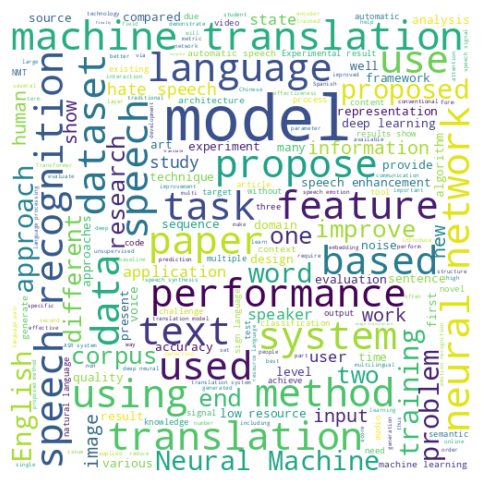

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crea la nube de palabras
wordcloud = WordCloud(width=500, height=500, background_color='white',relative_scaling=0.1).generate(text)

# Muestra la nube de palabras
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
wordcloud.to_file("ACM_wc.png")


SCOPUS

In [59]:
import matplotlib.pyplot as plt

# Datos de ejemplo
etiquetas = ['Ciencias de la Computación', 'Otras áreas']
cantidad = [64, 100 - 64]  # Cambia esto según tus datos

# Configuración del gráfico
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
colores = ['#FF9999', '#66B2FF']  # Colores de las partes de la torta
explode = (0.1, 0)  # Separa la primera parte (Ciencias de la Computación)

# Crea el gráfico de torta
plt.pie(cantidad, labels=etiquetas, autopct='%1.1f%%', colors=colores, explode=explode, startangle=140)

# Título del gráfico
plt.title('Distribución de Documentos en Scopus')

# Muestra el gráfico
plt.axis('equal')  # Esto asegura que el gráfico sea circular
plt.show()


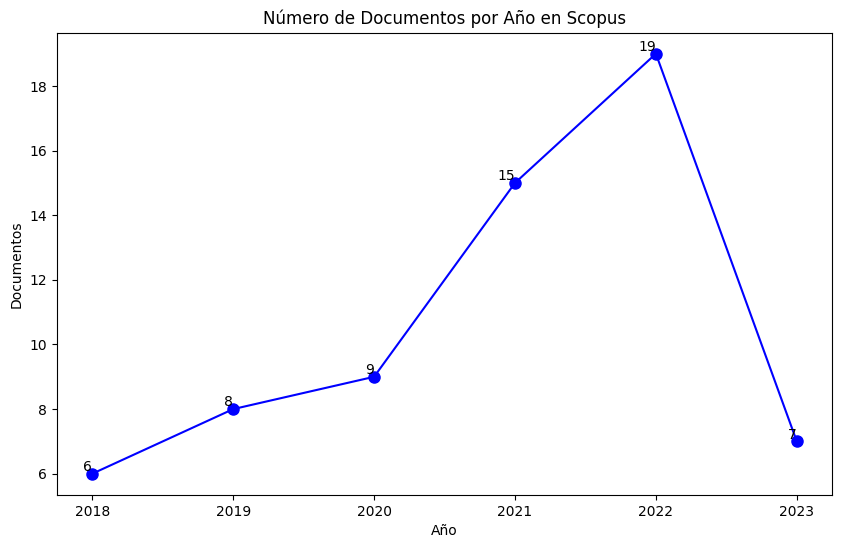

In [19]:
import matplotlib.pyplot as plt

# Datos
años = [2023, 2022, 2021, 2020, 2019, 2018]
documentos = [7, 19, 15, 9, 8, 6]  # Cambia estos valores según tus datos

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(años, documentos, marker='o', linestyle='-', color='b', markersize=8)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Documentos')
plt.title('Número de Documentos por Año en Scopus')

# Mostrar los valores en los puntos
for i, doc in enumerate(documentos):
    plt.text(años[i], doc, str(doc), ha='right', va='bottom')

# Mostrar el gráfico sin la cuadrícula
plt.show()


In [49]:
!pip install plotly
!apt-get install -y libgl1-mesa-glx
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,584 B of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libgl1-mesa-glx amd64 23.0.4-0ubuntu1~22.04.1 [5,584 B]
Fetched 5,584 B in 0s (29.5 kB/s)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Setting up libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
--2023-10-01 21:41:10--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage
Resolving github.com (github.com)... 140.82.112.3
Connecting to gith

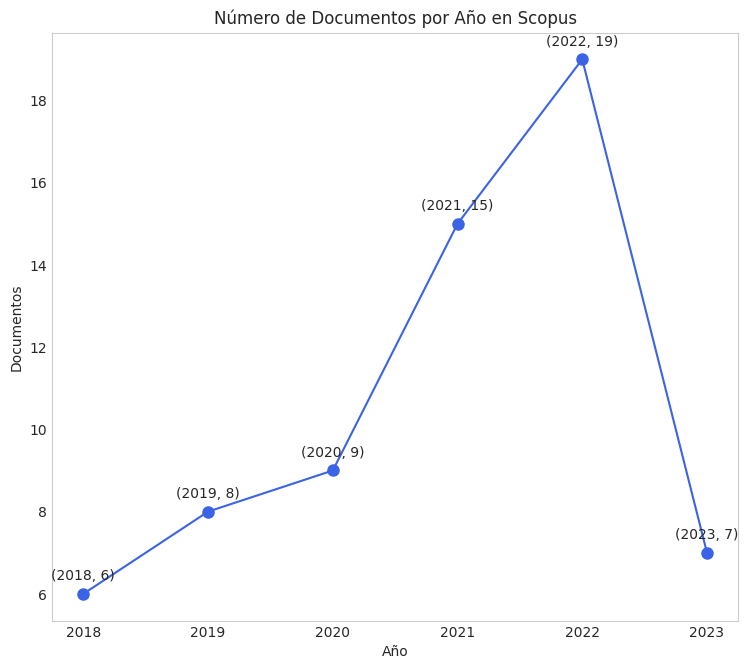

In [89]:
import matplotlib.pyplot as plt

# Datos
años = [2023, 2022, 2021, 2020, 2019, 2018]
documentos = [7, 19, 15, 9, 8, 6]  # Cambia estos valores según tus datos

# Crear el gráfico de líneas
plt.figure(figsize=(7, 6))  # Tamaño del gráfico
plt.plot(años, documentos, marker='o', linestyle='-', color='#3A63E5', markersize=8)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Documentos')
plt.title('Número de Documentos por Año en Scopus')

# Agregar los valores de x e y sin opacar los puntos
for i, doc in enumerate(documentos):
    plt.annotate(f'({años[i]}, {doc})', (años[i], doc), textcoords="offset points", xytext=(0,10), ha='center')

# Guardar el gráfico en un archivo PDF
plt.savefig('grafico-linea.pdf')

# Mostrar el gráfico en la ventana de salida
plt.show()


In [91]:
import plotly.graph_objects as go

# Datos
tipos_documento = ["Capítulo del libro", "Revisión de la conferencia", "Artículo", "Documento de sesión"]
documentos = [2, 10, 13, 39]

# Colores personalizados
colores = ['#CCC0FA', '#E266FA', '#D0FAB4', '#15E8D9']

# Crear un gráfico de torta moderno con Plotly
fig = go.Figure(data=[go.Pie(labels=tipos_documento, values=documentos, marker=dict(colors=colores))])
fig.update_traces(textposition='inside', textinfo='percent+label')

# Configurar el tamaño de la gráfica
fig.update_layout(
    showlegend=False,
    title_font=dict(size=24),  # Aumentar el tamaño de la letra del título
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(size=13),
    width=800,  # Ancho de la gráfica
    height=600,  # Alto de la gráfica
)

# Guardar el gráfico en un archivo PDF
fig.write_image("/content/grafico_tor.pdf")

